# Дискретна Фуриеова трансформација

ДФТ и инверзна ДФТ во Пајтон се прават со помош на функциите fft и ifft кои се дел од билбиотеката scipy.fft

Првиот пример е ДФТ на синусен сигнал

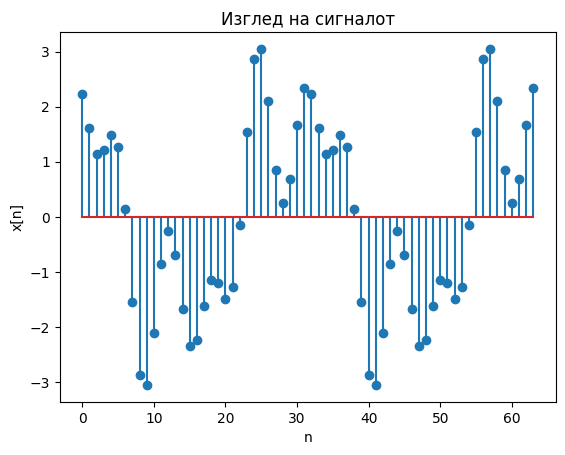

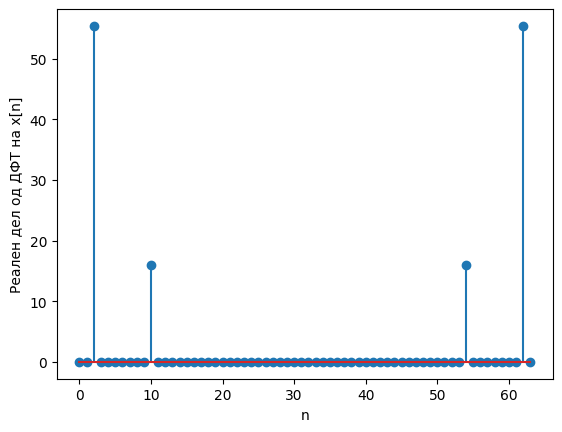

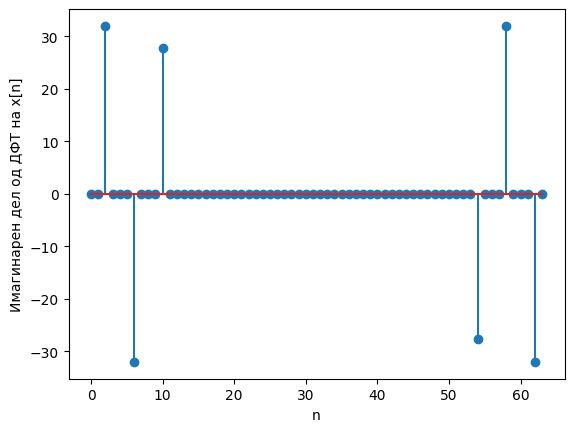

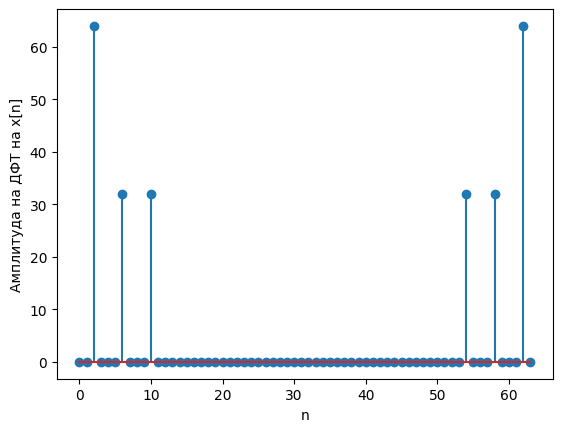

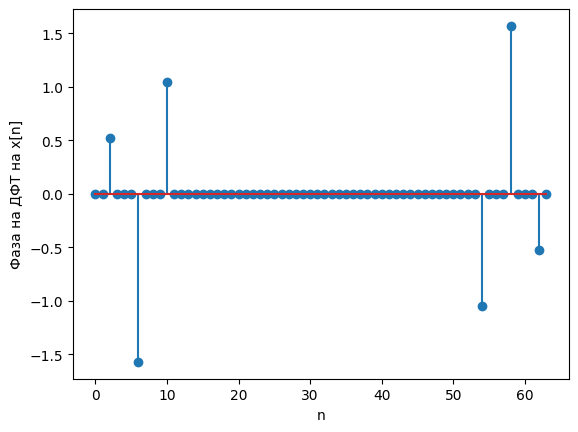

In [2]:
import numpy as np
import matplotlib.pyplot as plt
#import math
import cmath
from scipy.fft import fft, ifft  # gi zema samo ovie dve funkcii od bibliotekata

N = 64  # Должина на низата
n = np.asarray(list(range(0, N)))  # од 0 до 63
Omega = (2.0 * np.pi / 64) * 2
Fi = np.pi / 6
x = np.zeros(N)
for i in range(N):
    #x[i] = np.cos(Omega * i + Fi)
    x[i] = 2 * np.cos(Omega * i + Fi) + np.sin(Omega * 3 * i) + np.cos(Omega * 5 * i + np.pi / 3)

plt.figure()  # нова слика
plt.stem(n, x)  #, use_line_collection=True)  # abs(Niza) дава низа од апсолутни вредности
plt.xlabel('n')
plt.ylabel('x[n]')
plt.title('Изглед на сигналот')
plt.show()

DFT = fft(x)  # X[k] се комплексни броеви
plt.stem(n, DFT.real)  #, use_line_collection=True)  # Со KompleksenSignal.real се зема само реалниот дел
plt.xlabel('n')
plt.ylabel('Реален дел од ДФТ на x[n]')
plt.show()
plt.stem(n, DFT.imag)  #, use_line_collection=True)
plt.xlabel('n')
plt.ylabel('Имагинарен дел од ДФТ на x[n]')
plt.show()

# Пресметувањето на фаза не може да се направи на цел вектор одеднаш 
# и мора да оди член по член
Faza = np.zeros(N)
for i in range(N):
    if abs(DFT[i]) > 1.e-8:
        Faza[i] = cmath.phase(DFT[i])
plt.figure()  # нова слика
plt.stem(n, abs(DFT))  #, use_line_collection = True)  # abs(Niza) дава низа од апсолутни вредности
plt.xlabel('n')
plt.ylabel('Амплитуда на ДФТ на x[n]')
plt.show()
plt.stem(n, Faza)  #, use_line_collection = True)
plt.xlabel('n')
plt.ylabel('Фаза на ДФТ на x[n]')
plt.show()

#print(Faza)

ДФТ на скок сигнал со конечно траење $x[n] = \sum_{k=0}^{M-1} \delta[n-k]$. Во случајот траењето е 4, а целиот сигнал има должина 128

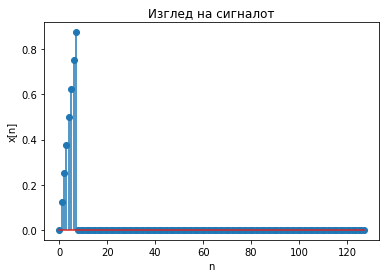

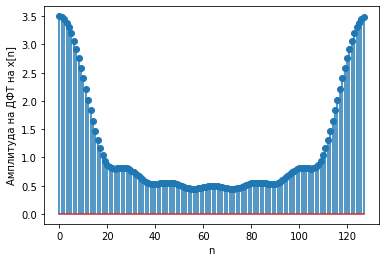

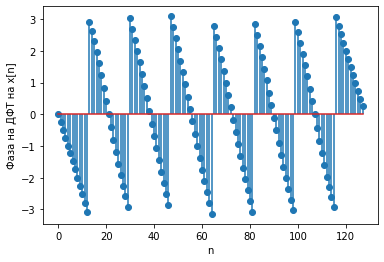

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import cmath
from scipy.fft import fft, ifft  # gi zema samo ovie dve funkcii od bibliotekata

N = 128  # Должина на низата
M = 8  # Колку трае скокнатиот дел
n = np.asarray(list(range(0, N)))
x = np.zeros(N)
for i in range(M):
    #    x[i] = i / M
    x[i] = i
DFT = fft(x)

# Пресметувањето на фаза не може да се направи на цел вектор одеднаш 
# и мора да оди член по член
Faza = np.zeros(N)
for i in range(N):
    Faza[i] = cmath.phase(DFT[i])

plt.figure()  # нова слика
plt.stem(n, x, use_line_collection=True)  # abs(Niza) дава низа од апсолутни вредности
plt.xlabel('n')
plt.ylabel('x[n]')
plt.title('Изглед на сигналот')
plt.show()

plt.stem(n, abs(DFT), use_line_collection=True)  # abs(Niza) дава низа од апсолутни вредности
plt.xlabel('n')
plt.ylabel('Амплитуда на ДФТ на x[n]')
plt.show()
plt.stem(n, Faza, use_line_collection=True)
plt.xlabel('n')
plt.ylabel('Фаза на ДФТ на x[n]')
plt.show()